In [1]:
from report_generator import PostmodelingReport

import yaml
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt

def get_conn(config_file):
    with open(config_file) as fd:
        config = yaml.safe_load(fd)
        dburl = sqlalchemy.engine.url.URL(
            "postgres",
            host=config["host"],
            username=config["user"],
            database=config["db"],
            password=config["pass"],
            port=config["port"],
        )
        conn = sqlalchemy.create_engine(dburl, poolclass=sqlalchemy.pool.QueuePool)
        return conn
config_file = '../database_mvesc.yaml'
conn = get_conn(config_file)
project_path = 's3://dsapp-social-services-migrated/mvesc/triage_experiments/'


In [2]:
model_group_ids = [698, 733, 734, 777, 778, 780, 781, 840, 596, 791]
experiment_hash = ['29defd8d52dbc3735b79fbe152b2c1e9', '4b38bf6ddb23dccee50e343845e0184a', '4dd20137bfa1947c06be7a0f7f1de1be']
report = PostmodelingReport(conn, model_group_ids, experiment_hash)

In [3]:
report.display_model_groups()

,model_group_id,train_end_time,model_id,model_type,hyperparameters
0,698,2016-08-01,1430,sklearn.ensemble.RandomForestClassifier,"{'max_depth': 10, 'max_features': 3, 'n_estima..."
1,698,2017-08-01,1464,sklearn.ensemble.RandomForestClassifier,"{'max_depth': 10, 'max_features': 3, 'n_estima..."
2,733,2016-08-01,1403,triage.component.catwalk.estimators.classifier...,"{'C': 100, 'penalty': 'l1'}"
3,733,2017-08-01,1406,triage.component.catwalk.estimators.classifier...,"{'C': 100, 'penalty': 'l1'}"
4,734,2016-08-01,1392,triage.component.catwalk.estimators.classifier...,"{'C': 100, 'penalty': 'l2'}"
5,734,2017-08-01,1394,triage.component.catwalk.estimators.classifier...,"{'C': 100, 'penalty': 'l2'}"
6,777,2016-08-01,1390,triage.component.catwalk.estimators.classifier...,"{'C': 1, 'penalty': 'l2'}"
7,777,2017-08-01,1420,triage.component.catwalk.estimators.classifier...,"{'C': 1, 'penalty': 'l2'}"
8,778,2016-08-01,1404,triage.component.catwalk.estimators.classifier...,"{'C': 10, 'penalty': 'l1'}"
9,778,2017-08-01,1423,triage.component.catwalk.estimators.classifier...,"{'C': 10, 'penalty': 'l1'}"


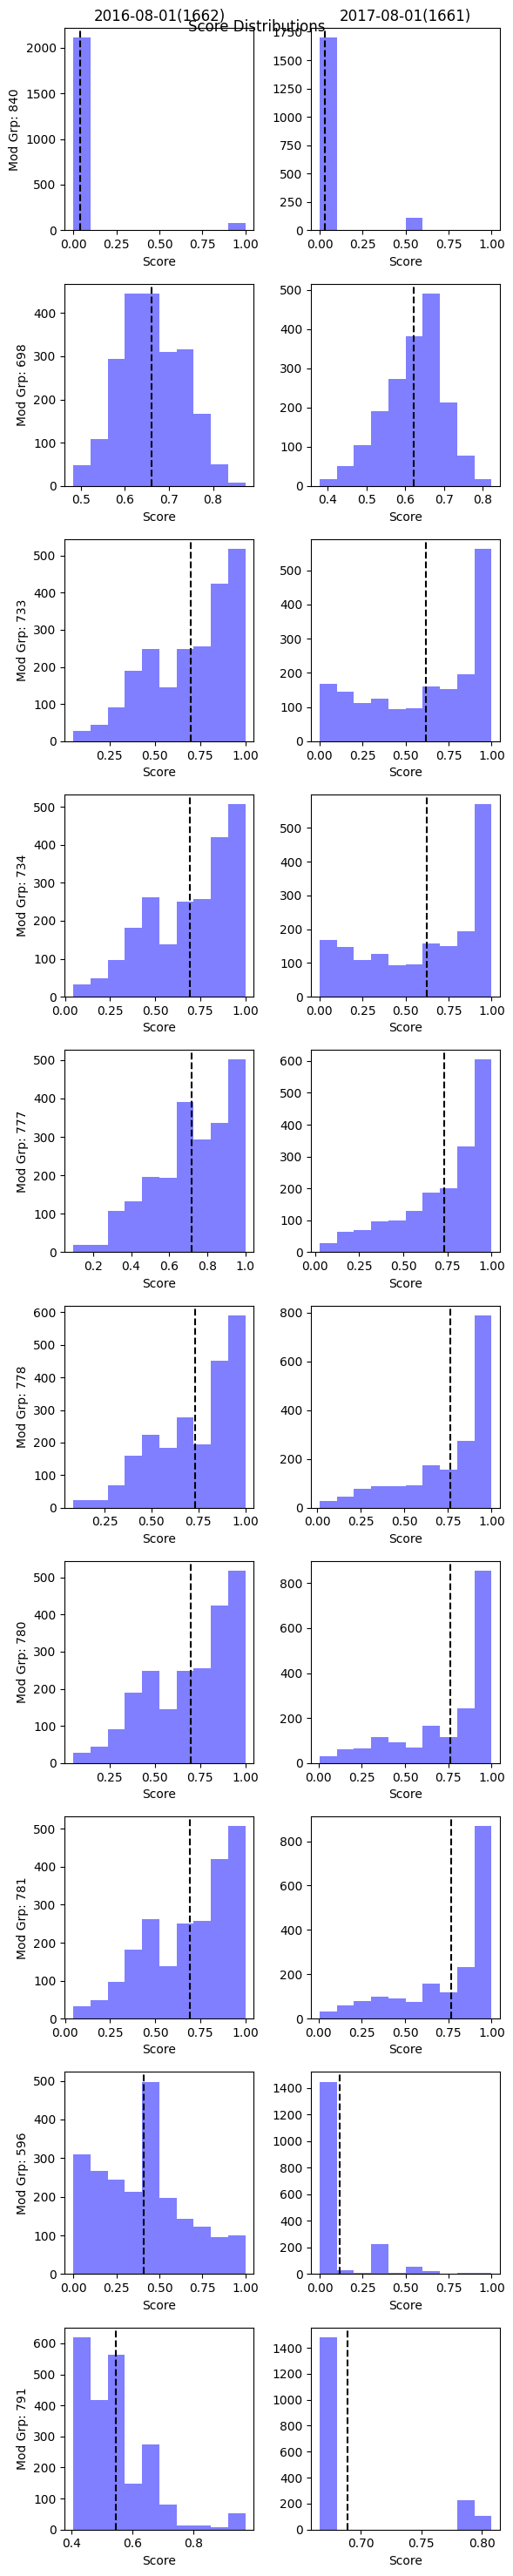

In [4]:
# our models

report.plot_score_distributions(use_labels=False)

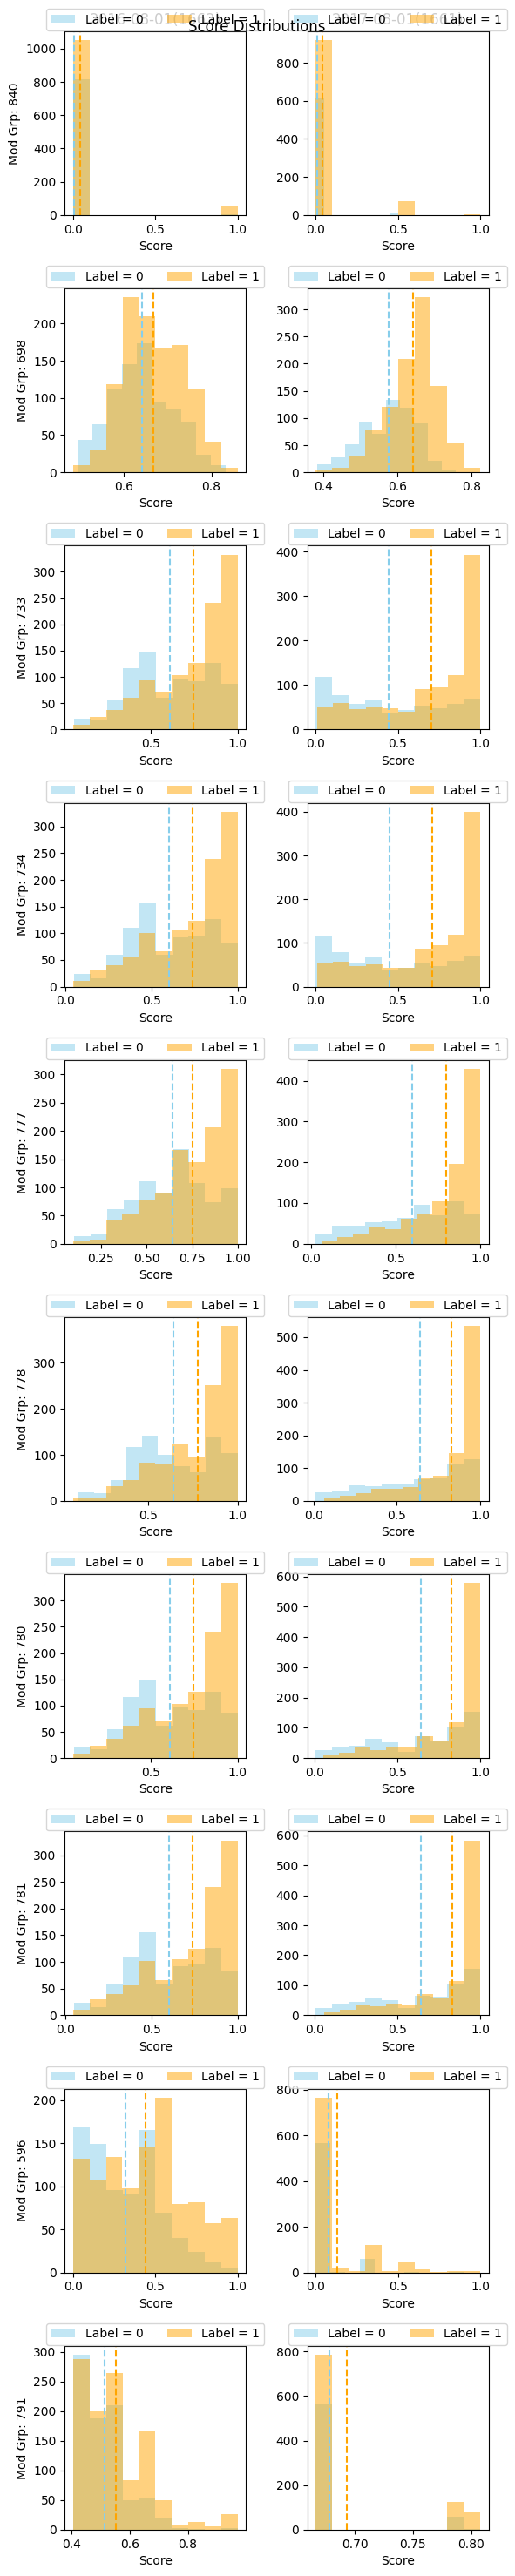

In [5]:
report.plot_score_distributions(use_labels=True)

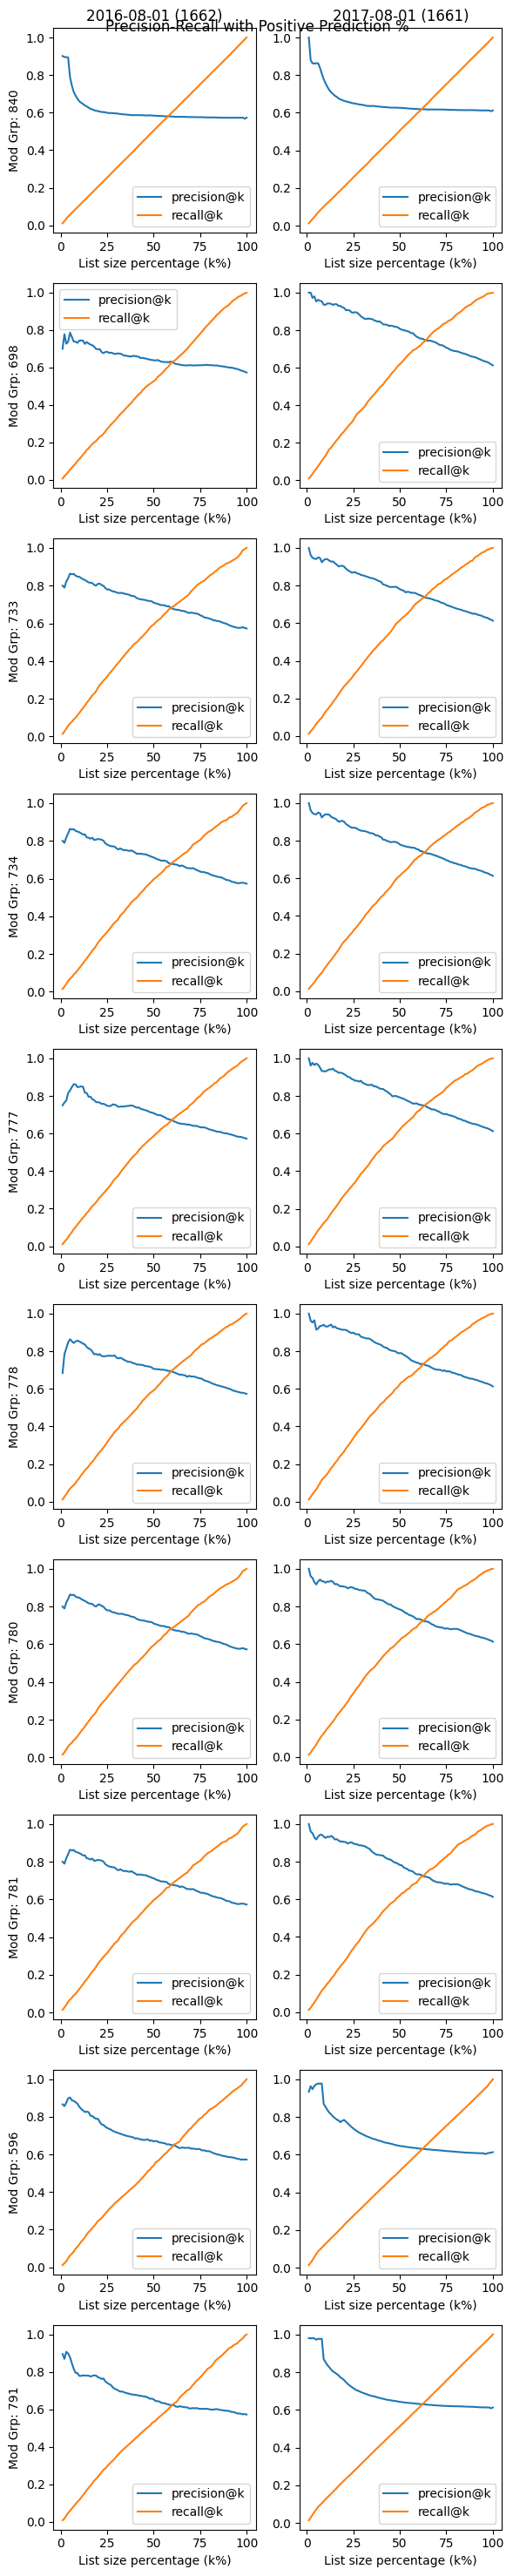

In [6]:
report.plot_prk_curves()

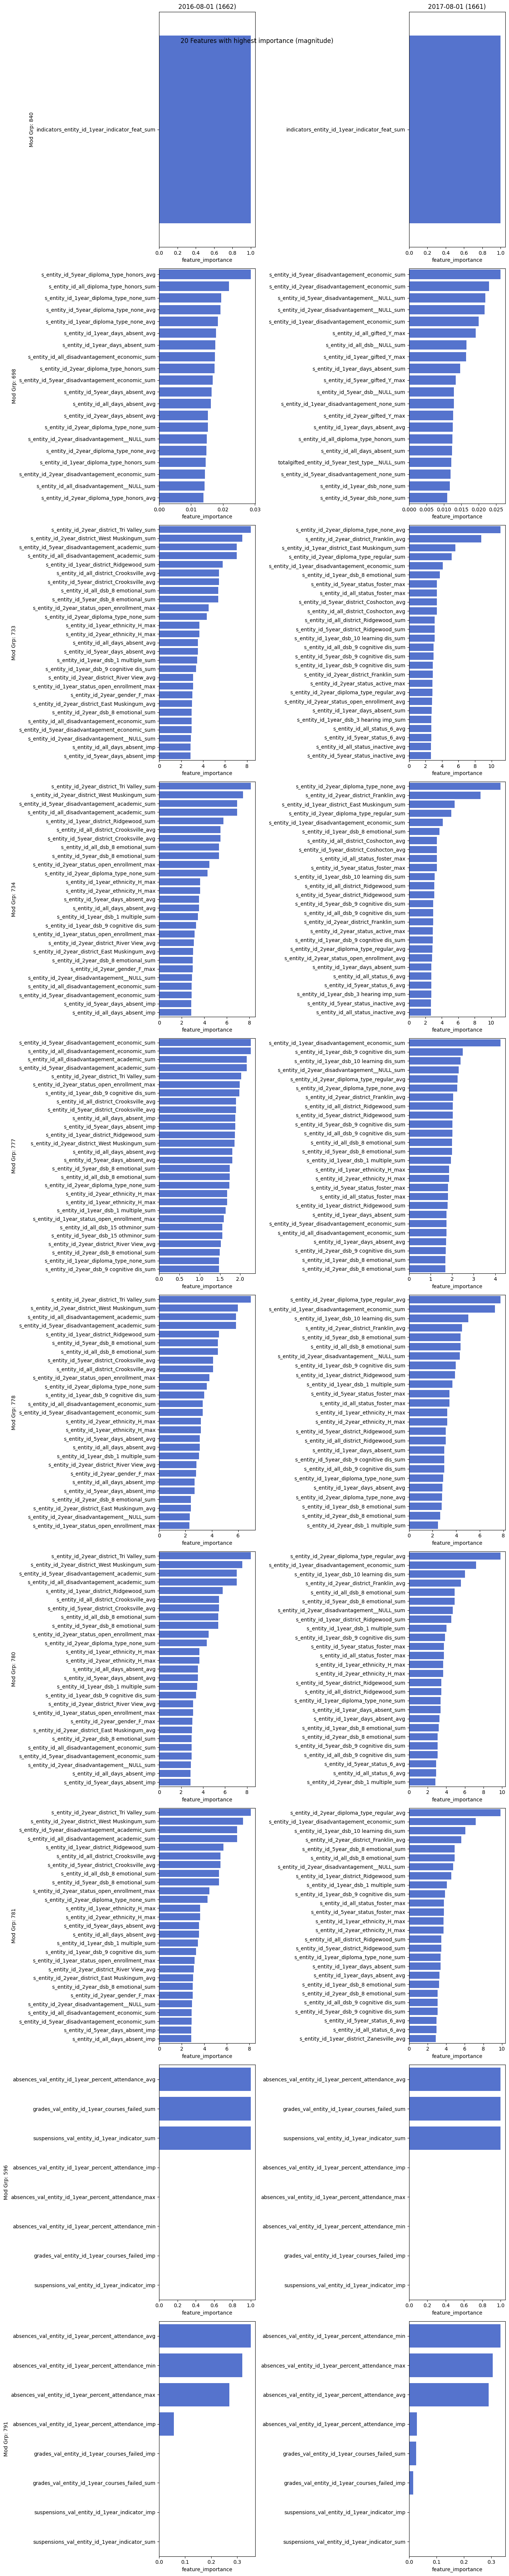

In [7]:
report.plot_feature_importance()

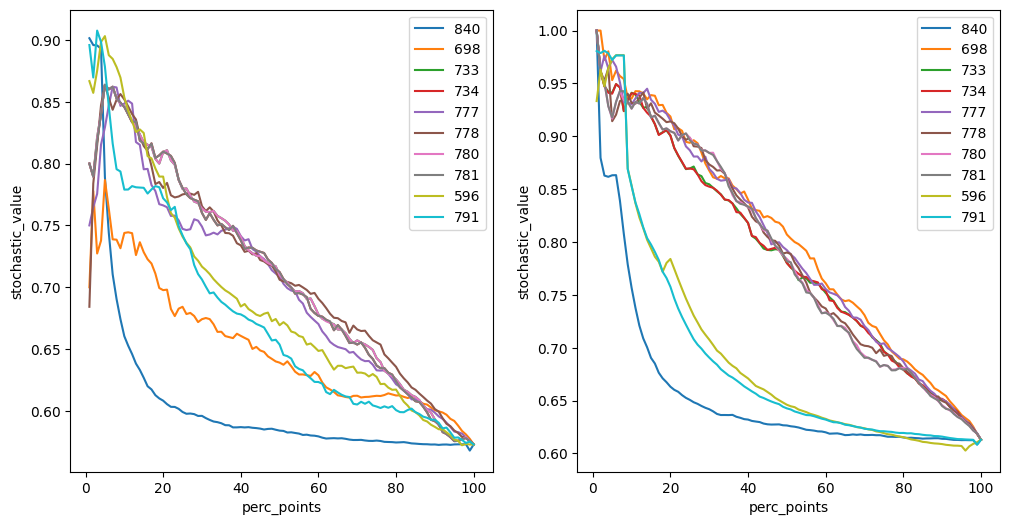

In [8]:
report.plot_precision_vs_param()

In [9]:
report.calculate_crosstabs_pos_vs_neg(project_path, {'rank_abs_no_ties': 100})

2023-04-18 16:02:03 -    INFO Found credentials in shared credentials file: ~/.aws/credentials
2023-04-18 16:02:04 -    INFO Crosstabs using threshold: rank_abs_no_ties <= 100
2023-04-18 16:02:04 -    INFO mean_predicted_positive
2023-04-18 16:02:04 -    INFO mean_predicted_negative
2023-04-18 16:02:04 -    INFO std_predicted_positive
2023-04-18 16:02:04 -    INFO std_predicted_negative
2023-04-18 16:02:04 -    INFO mean_ratio_predicted_positive_to_predicted_negative
2023-04-18 16:02:04 -    INFO support_predicted_positive
2023-04-18 16:02:04 -    INFO support_predicted_negative
2023-04-18 16:02:04 -    INFO support_pct_predicted_positive
2023-04-18 16:02:04 -    INFO support_pct_predicted_negative
2023-04-18 16:02:04 -    INFO Pushing the results to the DB
2023-04-18 16:02:04 -    INFO Crosstabs using threshold: rank_abs_no_ties <= 100
2023-04-18 16:02:04 -    INFO mean_predicted_positive
2023-04-18 16:02:04 -    INFO mean_predicted_negative
2023-04-18 16:02:04 -    INFO std_predicted


            select 
                model_id, 
                feature, 
                metric, 
                abs(value) as value 
            from test_results.crosstabs 
            where threshold_type = 'rank_abs_no_ties'
            and threshold = 100
            and metric in (
                'mean_ratio_predicted_positive_to_predicted_negative',
                'mean_predicted_positive',
                'mean_predicted_negative',
                'support_pct_predicted_positive',
                'support_pct_predicted_negative'
            )
            and model_id = 1662            
        
crosstabs found
2023-04-18 16:07:54 -   ERROR Please run calculate_crosstabs_pos_vs_neg function to calculate crosstabs first for all models!

            select 
                model_id, 
                feature, 
                metric, 
                abs(value) as value 
            from test_results.crosstabs 
            where threshold_type = 'rank_abs_no_ties'
            a

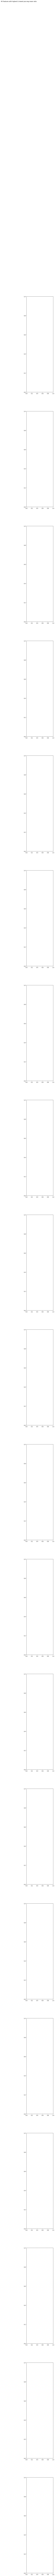

In [3]:
report.display_crosstab_pos_vs_neg(threshold_type='rank_abs_no_ties', threshold=100)